## 1) มาดูข้อมูลดิบกันก่อน

### 1.1 Import library ที่จำเป็น

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1.2 อ่านข้อมูล

In [2]:
data = pd.read_csv('GDP_Thailand.csv', parse_dates = True, index_col = 0)
data.columns=['GDP']

### 1.3 ใส่ข้อมูลไว้ในตัวแปร thGDP เพื่อใช้งานในอนาคต

In [3]:
thGDP = data['GDP']

### 1.4) ทดลองพล็อตข้อมูลดู

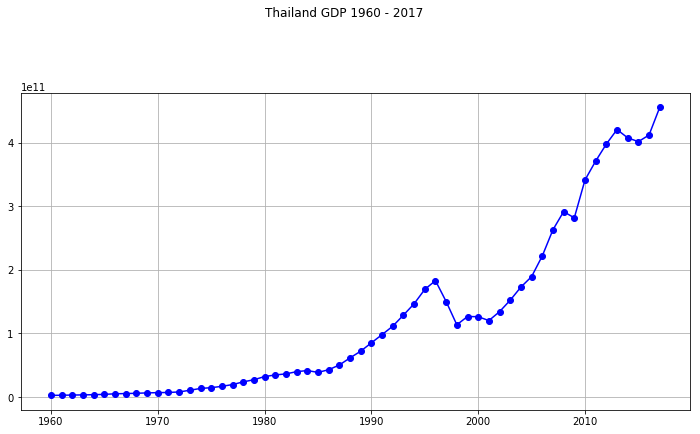

In [4]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP,  color = 'blue', marker = 'o')

plt.suptitle('Thailand GDP 1960 - 2017')
ax1.grid(True, zorder=0)

## 2) เช็คความเป็น Stationary ของข้อมูล

### สร้างฟังชันก์เพื่อใช้ในการทดสอบ Stationary ชื่อ Stationary_test

In [5]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries):

    print('Augment Dicky Fuller Test:')
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','P-Value','#Lags','Number of Observations'])

    print('Test_Statistic :' + str(adfoutput[0]))
    print('p-values :' + str(adfoutput[1]))
    print('Number of observation :' + str(adfoutput[3]))

### เรียกใช้งานฟังก์ชัน stationarity_test เพื่อทดสอบความเป็น stationary

In [6]:
stationarity_test(thGDP)

Augment Dicky Fuller Test:
Test_Statistic :1.7692502132100212
p-values :0.998286039650629
Number of observation :56.0


## 3) ทำให้ข้อมูล Stationary

### 3.1 หา Logarithm ของข้อมูล

In [7]:
thGDP_log = np.log(thGDP)

ทดลองพล็อตข้อมูลดูก่อน ว่าข้อมูลเปลี่ยนไปอย่างไรหลังคำนวณ logarithm

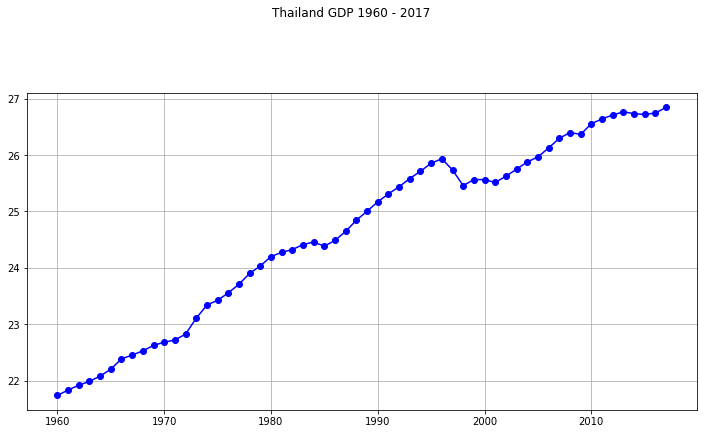

In [8]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP_log,  color = 'blue', marker = 'o')

plt.suptitle('Thailand GDP 1960 - 2017')
ax1.grid(True, zorder=0)

### เรียกใช้งานฟังก์ชัน stationarity_test เพื่อทดสอบความเป็น stationary

In [9]:
sta_result = stationarity_test(thGDP_log)

Augment Dicky Fuller Test:
Test_Statistic :-1.4143272961077162
p-values :0.5753884862770835
Number of observation :56.0


### 3.2 กำจัดแนวโน้ม (Trends) ออกจากข้อมูล

In [10]:
thGDP_log_diff = thGDP_log - thGDP_log.shift()
thGDP_log_diff.dropna(inplace = True)

ทดลองพล็อตข้อมูลดูก่อน ว่าข้อมูลเปลี่ยนไปอย่างไรหลังกำจัดแนวโน้มออกจากข้อมูล

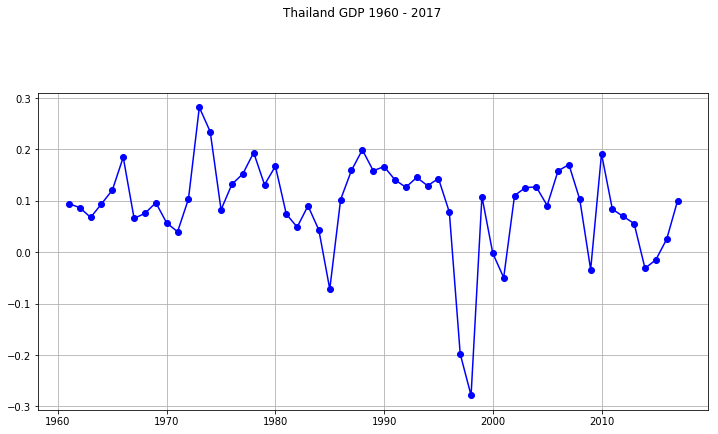

In [11]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP_log_diff,  color = 'blue', marker = 'o')

plt.suptitle('Thailand GDP 1960 - 2017')
ax1.grid(True, zorder=0)

### เรียกใช้งานฟังก์ชัน stationarity_test เพื่อทดสอบความเป็น stationary

In [12]:
sta_result = stationarity_test(thGDP_log_diff)

Augment Dicky Fuller Test:
Test_Statistic :-4.578109171707093
p-values :0.00014171732531384552
Number of observation :56.0


## 4) กำหนดค่าตัวแปร p และ q ด้วยการพล็อต ACF และ PACF

In [13]:
from statsmodels.tsa.stattools import acf, pacf

thAcf = acf(thGDP_log_diff, nlags=20)
thPacf = pacf(thGDP_log_diff, nlags=20, method='ols')

## 4.1 พล็อต ACF

Text(0.5, 1.0, 'ACF')

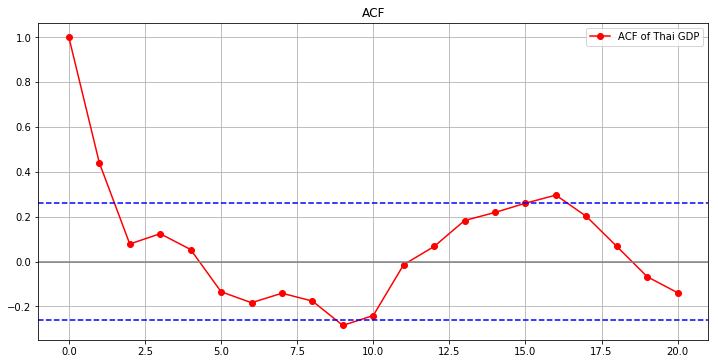

In [14]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thAcf, label = 'ACF of Thai GDP', color = 'red', marker = 'o')
ax1.axhline(y=0,color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(thGDP_log_diff)), linestyle='--', color= 'blue')

ax1.axhline(y=1.96/np.sqrt(len(thGDP_log_diff)), linestyle= '--', color= 'blue')

ax1.grid(True, zorder=0)
plt.legend(loc = 'best')
plt.title('ACF')

## พล็อต PACF

Text(0.5, 1.0, 'PACF')

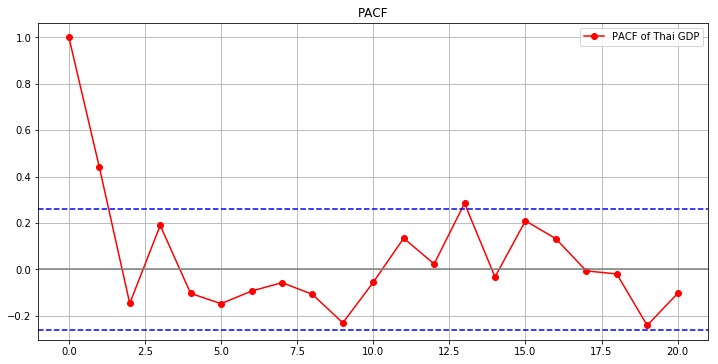

In [15]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thPacf, label = 'PACF of Thai GDP', color = 'red', marker = 'o')
ax1.axhline(y=0,color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(thGDP_log_diff)), linestyle='--', color= 'blue')
ax1.axhline(y=1.96/np.sqrt(len(thGDP_log_diff)), linestyle= '--', color= 'blue')

ax1.grid(True, zorder=0)
plt.legend(loc = 'best')
plt.title('PACF')

หาค่า p จากจุดตัดของกราฟ PACF

In [16]:
cut_point = 1.96/np.sqrt(len(thGDP_log_diff))

p = 0;
idxP = 0;

for j in range(0, len(thPacf)):
    if thPacf[j] < cut_point:
        p = thPacf[j]
        idxP = j
        break

print("p = ", idxP)

p =  2


หาค่า p จากจุดตัดของกราฟ ACF

In [17]:
q = 0;
idxQ = 0;

for i in range(0, len(thAcf)):
    if thAcf[i] < cut_point:
        q = thAcf[i]
        idxQ = i
        break

print("q = ", idxQ)

q =  2


## 5) ทำนายค่า Time Series ด้วย AR Model

In [18]:
from statsmodels.tsa.arima_model import ARIMA

ทำนายด้วย AR model (set q = 0)

/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/siriphan/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/siriphan/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]`

Text(0.5, 1.0, 'RSS: 0.382125')

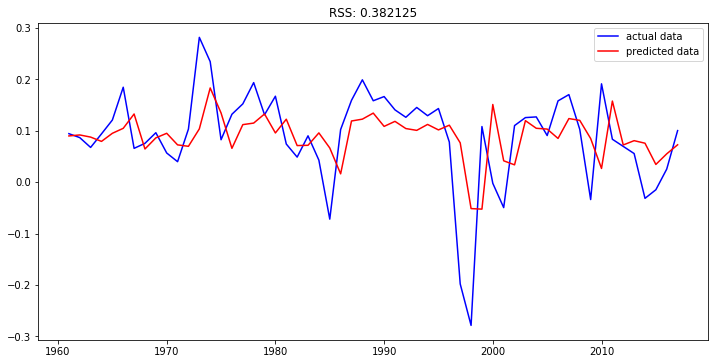

In [19]:
model1 = ARIMA(thGDP_log, order=(idxP, 1, 0))
results_AR = model1.fit(disp=-1)

plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP_log_diff, color = 'blue', label = 'actual data')
ax1.plot(results_AR.fittedvalues, color='red', label = 'predicted data')

plt.legend(loc = 'best')

plt.title('RSS: %f' % np.sum((results_AR.fittedvalues-thGDP_log_diff)**2))

## 6) ทำนายค่า Time Series ด้วย MA Model

ทำนายด้วย AR model (set p = 0)

/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.372505')

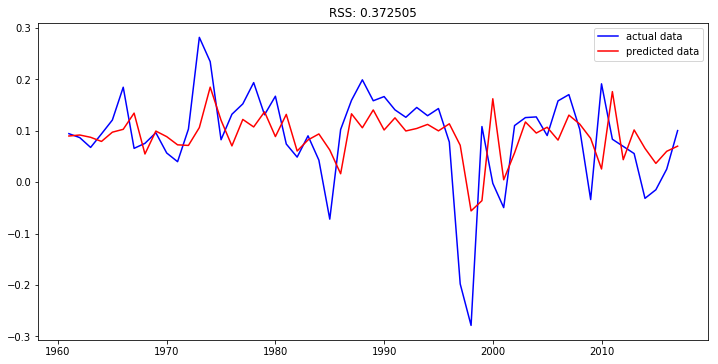

In [20]:
model2 = ARIMA(thGDP_log, order=(0, 1, idxQ))
results_MA = model2.fit(disp=-1)

plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP_log_diff, color = 'blue', label = 'actual data')
ax1.plot(results_MA.fittedvalues, color='red', label = 'predicted data')

plt.legend(loc = 'best')

plt.title('RSS: %f' % np.sum((results_MA.fittedvalues-thGDP_log_diff)**2))

## 7) ทำนายค่า Time Series ด้วย ARIMA Model

/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/siriphan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.371102')

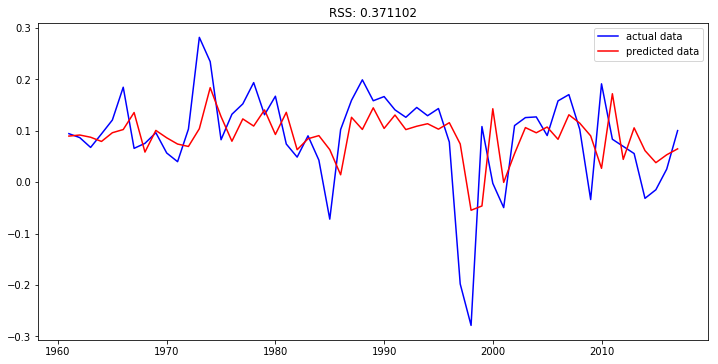

In [21]:
model3 = ARIMA(thGDP_log, order=(idxP, 1, idxQ))
results_ARIMA = model3.fit(disp=-1)

plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP_log_diff, color = 'blue', label = 'actual data')
ax1.plot(results_ARIMA.fittedvalues, color='red', label = 'predicted data')

plt.legend(loc = 'best')
plt.title('RSS: %f' % np.sum((results_ARIMA.fittedvalues-thGDP_log_diff)**2))

## 8) ปรับข้อมูลทำนายกลับไปสู่สเกลเดิมของข้อมูล

In [22]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_log = pd.Series(thGDP_log.ix[0], index=thGDP_log.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA = np.exp(prediction_ARIMA_log)

/home/siriphan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


พล็อตข้อมูลข้อมูลดิบ เปรียบเทียบกับค่าที่ใช้ ARIMA model ทำนาย

Text(0.5, 1.0, 'Result comparison between actual and predicted data')

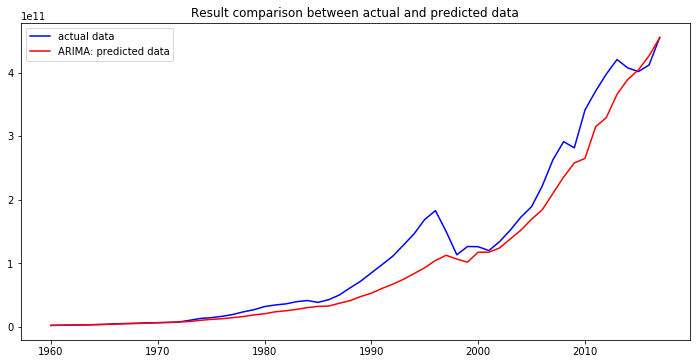

In [23]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(thGDP, color = 'blue', label = 'actual data')
ax1.plot(prediction_ARIMA, color='red', label = 'ARIMA: predicted data')

plt.legend(loc = 'best')
plt.title('Result comparison between actual and predicted data')